**Load libraries**

In [1]:
import LinearAlgebra as linalg
import Statistics as stats
import Distributions as dist
import Random as random
import Plots as plt
import QuantEcon as qe
;

**Utility functions**

**Problem 1**

We have that $w_t = \bar{w} + \rho w_{t-1} + \epsilon_{t}$. Thus $E(w_t) = E(\bar{w} + \rho w_{t-1} + \epsilon_{t}) = \bar{w} + \rho E(w_{t-1})$. We can recursively define $E(w_{t}) = \sum_{j=0}^{t} \rho^{j}\bar{w}$ and as $t \rightarrow \infty$, $E(w_{t}) = \frac{\bar{w}}{1 - \rho}$. We can then define

\begin{align*}
Var(w_t) &= E((w_t - E(w_t))(w_t - E(w_t))') \\
&= E(w_t w_t' - w_t E(w_t)' - E(w_t) w_t' + E(w_t)E(w_t)') \\
&= E(w_t w_t') - E(w_t)E(w_t)' \\
&= E((\bar{w} + \rho w_{t-1} + \epsilon_t)(\bar{w} + \rho w_{t-1} + \epsilon_t)') - \frac{\bar{w}^2}{(1 - \rho)^2} \\
&= E(\bar{w}\bar{w}' + \rho^2 w_{t-1}w_{t-1}' + \epsilon_t \epsilon_t' + \rho\bar{w} w_{t-1}' + \bar{w}\epsilon_t' + \rho w_{t-1}\bar{w} + \rho w_{t-1}\epsilon_t' + \epsilon_t\bar{w} + \rho \epsilon_t w_{t-1}') - \frac{\bar{w}^2}{(1 - \rho)^2} \\
&= \bar{w}^2 + \rho^2 E(w_{t-1} w_{t-1}') + \sigma_{e}^{2} + \rho\bar{w} E(w_{t-1}') + \rho E(w_{t-1})\bar{w} - \frac{\bar{w}^2}{(1 - \rho)^2} \\
&= \bar{w}^2 + \rho^2 E(w_{t-1} w_{t-1}') + \sigma_{e}^{2} + 2 \rho\bar{w}\frac{\bar{w}}{1 - \rho} - \frac{\bar{w}^2}{(1 - \rho)^2} \\
&= \rho^2 E(w_{t-1} w_{t-1}') + \sigma_{e}^{2} + \frac{(1 + \rho)\bar{w}^{2}}{1 - \rho} - \frac{\bar{w}^2}{(1 - \rho)^2}
\end{align*}

and we can use the form $E(w_t w_t') = \rho^2 E(w_{t-1} w_{t-1}') + \sigma_{e}^{2} + \frac{(1 + \rho)\bar{w}^{2}}{1 - \rho}$ to recursively solve for the RHS equation.

\begin{align*}
E(w_t w_t') &= \rho^2 E(w_{t-1} w_{t-1}') + \sigma_{e}^{2} + \frac{(1 + \rho)\bar{w}^{2}}{1 - \rho} \\
&= \sum_{i=0}^{t} \rho^{2i} \sigma_{e}^{2} + \frac{(1 + \rho) \rho^{2i}\bar{w}^{2}}{1 - \rho} \\
&= \frac{\sigma_{e}^{2}}{1 - \rho^{2}} + \frac{(1 + \rho)\bar{w}^{2}}{(1 - \rho)(1 - \rho^{2})}
\end{align*}

and revisiting $Var(w_t)$,
\begin{align*}
Var(w_t) &= \frac{\sigma_{e}^{2}}{1 - \rho^{2}} + \frac{(1 - \rho)(1 + \rho)\bar{w}^{2}}{(1 - \rho)^{2}(1 - \rho^{2})} - \frac{(1 - \rho^{2})\bar{w}^2}{(1 - \rho)^2(1 - \rho^{2})} \\
&= \frac{\sigma_{e}^{2}}{1 - \rho^{2}} + \frac{(1 - \rho^{2})\bar{w}^{2}}{(1 - \rho)^{2}(1 - \rho^{2})} - \frac{(1 - \rho^{2})\bar{w}^2}{(1 - \rho)^2(1 - \rho^{2})} \\
&= \frac{\sigma_{e}^{2}}{1 - \rho^{2}}
\end{align*}

Given the income process is defined as
\begin{align*}
y_{t} &= exp\{w_t\} \\
&= exp\{\bar{w} + \rho w_{t-1} + e_{t}\}
\end{align*}

and we seek $\bar{w}$ such that $E(y_{t}) = E(exp\{\bar{w} + \rho w_{t-1} + e_{t}\}) = 1$, from the fact that $E(exp\{w_t\}) = exp\{E(w_t) + \frac{1}{2}Var(w_t)\}$,

\begin{align*}
E(y_{t}) = 1 &= E(exp(w_t)) \\
&= exp\{E(w_t) + \frac{1}{2}Var(w_t)\} \\
&= exp\{\frac{\bar{w}}{1 - \rho} + \frac{1}{2}\frac{\sigma_{e}^{2}}{1 - \rho^{2}}\} \\
0 &= \frac{\bar{w}}{1 - \rho} + \frac{1}{2}\frac{\sigma_{e}^{2}}{1 - \rho^{2}} \\
\bar{w} &= -\frac{\sigma_{e}^{2}}{2(1 + \rho)}
\end{align*}

**Theoretical moments**

In [2]:
vₑ = 0.06
σₑ = sqrt(vₑ)
μₑ = 0
Dₑ = dist.Normal(μₑ, σₑ)
ρ = 0.90

# Set w̄ according to derivations
w̄ = -vₑ / (2*(1 + ρ))
tmean = w̄ / (1 - ρ)
tvar = vₑ / (1 - ρ^2)

# For when we set ρ = 0.98
vₑ98 = (1 - 0.98^2) * tvar
σₑ98 = sqrt(vₑ98)
Dₑ98 = dist.Normal(μₑ, σₑ98)
ρ98 = 0.98
w̄98 = -vₑ98 / (2*(1 + ρ98))
tmean98 = w̄98 / (1 - ρ98)
tvar98 = vₑ98 / (1 - ρ98^2)
;

**Discretization and simulation functions**

In [3]:
#==========================================================================================
# Markov Chain
==========================================================================================#
mutable struct MarkovChain
    theta::Array{Float64}
    states::Array{Float64}
    mean::Union{Float64, Missing}
    var::Union{Float64, Missing}
    std::Union{Float64, Missing}
end

function simulate!(markovchain, periods=1000, burn=0, replications=0; random_state=-1)
    if random_state >= 0
        random.seed!(random_state)
    end
    N = length(markovchain.states)
    
    # Configure CDF
    Θ = Array{dist.Categorical{Float64, Vector{Float64}}}(undef, N)
    for i = 1:N
        Θ[i] = dist.Categorical(markovchain.theta[i, :])
    end

    # Initialize index of realized states and run burn-in
    index_series = Array{Int64}(undef, periods)
    index_series[1] = rand(1:N)
    if burn > 0
        for _ = 1:burn
            index_series[1] = dist.rand(Θ[index_series[1]], 1)[1]
        end
    end

    # Run simulation
    for t = 2:periods
        index_series[t] = dist.rand(Θ[index_series[t-1]], 1)[1]
    end
    
    state_series = Array{Float64}(undef, periods)
    for t = 1:periods
        state_series[t] = markovchain.states[index_series[t]]
    end

    markovchain.mean = stats.mean(state_series)
    markovchain.var = stats.var(state_series)
    markovchain.std = stats.std(state_series)

    # If replication is specified, rerun simulation and take average of moments
    if replications > 0
        for replication = 1:replications
            index_series[1] = rand(1:N)
            if burn > 0
                for _ = 1:burn
                    index_series[1] = dist.rand(Θ[index_series[1]], 1)[1]
                end
            end

            for t = 2:periods
                index_series[t] = dist.rand(Θ[index_series[t-1]], 1)[1]
            end
            
            for t = 1:periods
                state_series[t] = markovchain.states[index_series[t]]
            end

            markovchain.mean += stats.mean(state_series)
            markovchain.var += stats.var(state_series)
            markovchain.std += stats.std(state_series)
        end
        markovchain.mean /= (replications + 1)
        markovchain.var /= (replications + 1)
        markovchain.std /= (replications + 1)
    end

    return state_series
end
;

In [4]:
function tauchen(
    mean,
    variance,
    N,
    m,
    rho;
    print_output=false
    )
    σ = sqrt(variance)
    v = variance
    μ = mean
    states = Array{Float64}(undef, N)
    states[N] = m*sqrt(v / (1 - rho^2))
    states[1] = -states[N]
    if print_output
        println("States:")
        println(states[1])
    end
    d = (states[N] - states[1])/(N - 1)
    for i = 2:N-1
        states[i] = states[1] + (i - 1)*d
        if print_output
            println(states[i])
        end
    end
    if print_output
        println(states[N])
    end
    
    # Standard normal distribution for the normalized states
    D = dist.Normal(0, 1)
    
    # Transition matrix
    Θ = Array{Float64}(undef, (N, N))
    for i = 1:N
        for j = 1:N
            if j == 1
                Θ[i, j] = dist.cdf(D, (states[j] + d/2 - rho*states[i])/σ)
            elseif j == N
                Θ[i, j] = 1 - dist.cdf(D, (states[j] - d/2 - rho*states[i])/σ)
            else
                Θ[i, j] = dist.cdf(D, (states[j] + d/2 - rho*states[i])/σ) -
                    dist.cdf(D, (states[j] - d/2 - rho*states[i])/σ)
            end
        end
    end
    
    if print_output
        println("Θ:")
        for i = 1:N
            println(round.(Θ[i, :], digits=3))
        end
    end
    
    states .+= μ / (1 - rho)

    return MarkovChain(Θ, states, missing, missing, missing)
end

function rouwenhorst(
    mean,
    variance,
    N,
    rho;
    print_output=false
    )
    v = variance
    μ = mean

    ψ = sqrt(v / (1 - rho^2)) * sqrt(N - 1)

    states = Array{Float64}(undef, N)
    states[N] = ψ
    states[1] = -ψ
    if print_output
        println("States:")
        println(states[1])
    end
    d = (states[N] - states[1])/(N - 1)
    for i = 2:N-1
        states[i] = states[1] + (i - 1)*d
        if print_output
            println(states[i])
        end
    end
    if print_output
        println(states[N])
    end

    p = (1 + rho) / 2
    q = p
    
    # Transition matrix
    Θₙ = Array{Float64}(undef, (2, 2))
    Θₙ[1, 1] = p
    Θₙ[1, 2] = 1 - p
    Θₙ[2, 1] = 1 - q
    Θₙ[2, 2] = q
    Θ = Θₙ
    if N > 2
        global Θ
        global Θₙ
        for n = 3:N
            global Θ
            global Θₙ
            Θ = zeros((n, n))
            Θ[1:n-1, 1:n-1] += p .* Θₙ
            Θ[1:n-1, 2:n] += (1 - p) .* Θₙ
            Θ[2:n, 1:n-1] += (1 - q) .* Θₙ
            Θ[2:n, 2:n] += q .* Θₙ
            Θ[2:n-1, :] ./= 2
            Θₙ = Θ
        end
    end
    
    if print_output
        println("Θ:")
        for i = 1:N
            println(round.(Θ[i, :], digits=3))
        end
    end

    states .+= μ / (1 - rho)
    
    return MarkovChain(Θ, states, missing, missing, missing)
end
;

**Value function algorithms**

In [17]:
function u(c, gamma)
    return c^(1 - gamma) / (1 - gamma)
end

function u_c(c, gamma)
    return c^(-gamma)
end

function u_c_inv(c, gamma)
    return c^(-1/gamma)
end

function Eu_c_y(states, y, a1, A2_y, R, gamma, P)
    N = length(states)

    i_y = findfirst(state -> state == y, states)
    P_y = P[i_y, :]
    global u_c_y = 0.0
    for j = 1:N
        u_c_y += P_y[j] * u_c(R*a1 - A2_y[j] + states[j], gamma)
    end
    return u_c_y
end

function cEuler(states, y, a, a1, A2_y, R, beta, gamma, P)
    return u_c(R*a + y - a1, gamma) - beta * R * Eu_c_y(states, y, a1, A2_y, R, gamma, P)
end

function pfi_discretization(
    states,
    P,
    grid_length,
    grid_max,
    phi,
    nu,
    R,
    beta,
    gamma;
    max_iterations=1000,
    print_output=false
    )

    N = length(states)

    A = Array{Union{Float64, Missing}}(undef, grid_length)
    A[1] = phi
    A[grid_length] = grid_max
    for i = 2:grid_length-1
        A[i] = A[1] +
            (A[grid_length] - A[1])*((i - 1) / (grid_length - 1))^nu
    end

    A1 = Array{Union{Float64, Missing}}(undef, grid_length)
    A1[1] = phi
    A1[grid_length] = grid_max
    for i = 2:grid_length-1
        A1[i] = A1[1] +
            (A1[grid_length] - A1[1])*((i - 1) / (grid_length - 1))^nu
    end

    Ay1 = Array{Union{Float64, Missing}}(undef, (grid_length, N))
    for i = 1:grid_length
        for j = 1:N
            Ay1[i, j] = missing
        end
    end

    Ay2 = Array{Union{Float64, Missing}}(undef, (grid_length, N))
    for i = 1:grid_length
        for j = 1:N
            Ay2[i, j] = A1[i]
        end
    end

    for iteration = 1:max_iterations
        for i = 1:grid_length
            for j = 1:N
                ijk = cEuler(
                    states,
                    states[j],
                    A[i],
                    A1[1],
                    Ay2[1, :],
                    R,
                    beta,
                    gamma,
                    P
                )
                if print_output
                    println(i, ", ", j, ": ", ijk)
                end
                if ijk >= 0
                    Ay1[i, j] = A1[1]
                else
                    for k = 2:grid_length
                        if print_output
                            println("After (", k, "): ", ijk)
                        end
                        ijk1 = cEuler(
                            states,
                            states[j],
                            A[i],
                            A1[k],
                            Ay2[k, :],
                            R,
                            beta,
                            gamma,
                            P
                        )
                        if ijk1 >= 0
                            if abs(ijk1) <= abs(ijk)
                                Ay1[i, j] = A1[k]
                            else
                                Ay1[i, j] = A1[k-1]
                            end
                            break
                        else
                            ijk = ijk1
                            if print_output
                                println("Before (", k, "): ", ijk)
                            end
                        end
                    end
                end
            end
        end
        if maximum(skipmissing(Ay1 .== Ay2))
            break
        else
            Ay2[:, :] = Ay1[:, :]
        end
        if iteration == max_iterations
            if print_output
                println("Discretization failed to converge.")
            end
        end
    end

    return A, Ay1
end

function bisection(
    states,
    P,
    grid,
    grid_length,
    spoint,
    epoint,
    a,
    y,
    A2,
    R,
    beta,
    gamma;
    tolerance=1e-4,
    init=true,
    print_output=false
    )

    if init
        if print_output
            println("a: ", round(a, digits=3))
        end
        if grid[1] == spoint
            global A2m = A2[1, :]
        else
            for i = 1:grid_length - 1
                if grid[i+1] == spoint
                    global A2m = A2[i+1, :]
                    break
                elseif grid[i+1] > spoint
                    global A2m = A2[i, :] .+ (spoint - grid[i]) .* ((A2[i+1, :] .- A2[i, :]) ./ (grid[i+1] - grid[i]))
                    break
                end
            end
        end
        if print_output
            println("A2_sy: ", round.(A2m, digits=3))
        end
        spointE = cEuler(states, y, a, spoint, A2m, R, beta, gamma, P)
        if print_output
            println("S: ", round(spointE, digits=3))
        end
        if spointE > 0.0 - tolerance
            if print_output
                println("Converged to interior solution at startpoint.")
            end
            return spoint
        else
            mpoint = (spoint + epoint) / 2
            for i = 1:grid_length - 1
                if grid[i+1] == mpoint
                    global A2m = A2[i+1, :]
                    break
                elseif grid[i+1] > mpoint
                    global A2m = A2[i, :] .+ (mpoint - grid[i]) .* ((A2[i+1, :] .- A2[i, :]) ./ (grid[i+1] - grid[i]))
                    break
                end
            end
            if print_output
                println("A2_my: ", round.(A2m, digits=3))
            end
            mpointE = cEuler(states, y, a, mpoint, A2m, R, beta, gamma, P)
            if print_output
                println("M: ", round(mpointE, digits=3))
            end
            if abs(mpointE) <= 0.0 + tolerance
                if print_output
                    println("Converged to interior solution at midpoint.")
                end
                return mpoint
            elseif mpointE > 0.0 + tolerance
                if print_output
                    println("Setting bounds to (spoint, mpoint).")
                end
                return bisection(states, P, grid, grid_length, spoint, mpoint, a, y, A2, R, beta, gamma; tolerance=tolerance, init=false, print_output=print_output)
            else
                if grid[grid_length] == epoint
                    global A2m = A2[grid_length, :]
                else
                    for i = grid_length:-1:2
                        if grid[i-1] == epoint
                            global A2m = A2[i-1, :]
                            break
                        elseif grid[i-1] < epoint
                            global A2m = A2[i-1, :] .+ (epoint - grid[i-1]) .* ((A2[i, :] .- A2[i-1, :]) ./ (grid[i] - grid[i-1]))
                            break
                        end
                    end
                end
                if print_output
                    println("A2_ey: ", round.(A2m, digits=3))
                end
                epointE = cEuler(states, y, a, epoint, A2m, R, beta, gamma, P)
                if print_output
                    println("E: ", round(epointE, digits=3))
                end
                if epointE < 0.0 - tolerance
                    if print_output
                        println("Expand grid length or adjust curvature.")
                    end
                    return epoint
                elseif abs(epointE) <= 0.0 + tolerance
                    if print_output
                        println("Converged to interior solution at endpoint.")
                    end
                    return epoint
                else
                    if print_output
                        println("Setting bounds to (mpoint, epoint).")
                    end
                    return bisection(states, P, grid, grid_length, mpoint, epoint, a, y, A2, R, beta, gamma; tolerance=tolerance, init=false, print_output=print_output)
                end
            end
        end
    else
        mpoint = (spoint + epoint) / 2
        for i = 1:grid_length - 1
            if grid[i+1] == mpoint
                global A2m = A2[i+1, :]
                break
            elseif grid[i+1] > mpoint
                global A2m = A2[i, :] .+ (mpoint - grid[i]) .* ((A2[i+1, :] .- A2[i, :]) ./ (grid[i+1] - grid[i]))
                break
            end
        end
        if print_output
            println("A2_my: ", round.(A2m, digits=3))
        end
        mpointE = cEuler(states, y, a, mpoint, A2m, R, beta, gamma, P)
        if print_output
            println("M: ", round(mpointE, digits=3))
        end
        if abs(mpointE) <= 0.0 + tolerance
            if print_output
                println("Converged to interior solution at midpoint.")
            end
            return mpoint
        elseif mpointE > 0.0 + tolerance
            if print_output
                println("Setting bounds to (spoint, mpoint).")
            end
            return bisection(states, P, grid, grid_length, spoint, mpoint, a, y, A2, R, beta, gamma; tolerance=tolerance, init=false, print_output=print_output)
        else
            if print_output
                println("Setting bounds to (mpoint, epoint).")
            end
            return bisection(states, P, grid, grid_length, mpoint, epoint, a, y, A2, R, beta, gamma; tolerance=tolerance, init=false, print_output=print_output)
        end
    end
end

function pfi_interpolation(
    states,
    P,
    grid_length,
    grid_max,
    phi,
    nu,
    R,
    beta,
    gamma;
    max_iterations=1000,
    tolerance=1e-4,
    print_output=false
    )

    N = length(states)

    A = Array{Union{Float64, Missing}}(undef, grid_length)
    A[1] = phi
    A[grid_length] = grid_max
    for i = 2:grid_length-1
        A[i] = A[1] + (A[grid_length] - A[1])*((i - 1) / (grid_length - 1))^nu
    end

    A1 = Array{Union{Float64, Missing}}(undef, grid_length)
    A1[1] = phi
    A1[grid_length] = grid_max
    for i = 2:grid_length-1
        A1[i] = A1[1] + (A1[grid_length] - A1[1])*((i - 1) / (grid_length - 1))^nu
    end

    Ay1 = Array{Union{Float64, Missing}}(undef, (grid_length, N))
    for i = 1:grid_length
        for j = 1:N
            Ay1[i, j] = missing
        end
    end

    Ay2 = Array{Union{Float64, Missing}}(undef, (grid_length, N))

    for iteration = 1:max_iterations
        if print_output
            println("Iteration: ", iteration)
        end
        for i = 1:grid_length
            if iteration == 1
                Ay2 .= A[i]
            end
            for j = 1:N
                Ay1[i, j] = bisection(states, P, A, grid_length, phi, grid_max, A[i], states[j], Ay2, R, beta, gamma; tolerance=tolerance, print_output=print_output)
            end
        end
        error = maximum(abs.(skipmissing(Ay1 .- Ay2)))
        if error <= tolerance
            break
        else
            Ay2 = Ay1
            break
        end
        if iteration == max_iterations
            if print_output
                println("Interpolation failed to converge.")
            end
        end
    end

    return A, Ay1
end
;

**Problem 1A**

In [6]:
println("Problem 1a)")
markov = tauchen(w̄, vₑ, 5, 3, ρ; print_output=false)
yts5 = simulate!(markov, 10000, 1000, 100; random_state=42)
println("Sample moments (T5):")
println("Mean: ", round(markov.mean, digits=3))
println("Variance: ", round(markov.var, digits=3))
println("\nTheoretical moments:")
println("Mean: ", round(tmean, digits=3))
println("Variance: ", round(tvar, digits=3))

Problem 1a)
Sample moments (T5):
Mean: -0.158
Variance: 0.508

Theoretical moments:
Mean: -0.158
Variance: 0.316


We see that xyz

**Problem 1B**

In [7]:
println("Problem 1b)")
markov = tauchen(w̄, vₑ, 11, 3, ρ; print_output=false)
yts11 = simulate!(markov, 10000, 1000, 100; random_state=42)
println("Sample moments (T11):")
println("Mean: ", round(markov.mean, digits=3))
println("Variance: ", round(markov.var, digits=3))
println("\nTheoretical moments:")
println("Mean: ", round(tmean, digits=3))
println("Variance: ", round(tvar, digits=3))

Problem 1b)
Sample moments (T11):
Mean: -0.156
Variance: 0.358

Theoretical moments:
Mean: -0.158
Variance: 0.316


We see that xyz

**Problem 1C**

In [8]:
println("Problem 1c)")
markov = rouwenhorst(w̄, vₑ, 5, ρ; print_output=false)
yrs5 = simulate!(markov, 10000, 1000, 100; random_state=42)
println("Sample moments (R5):")
println("Mean: ", round(markov.mean, digits=3))
println("Variance: ", round(markov.var, digits=3))
markov = tauchen(w̄, vₑ, 5, 3, ρ; print_output=false)
yts5 = simulate!(markov, 10000, 1000, 100; random_state=42)
println("\nSample moments (T5):")
println("Mean: ", round(markov.mean, digits=3))
println("Variance: ", round(markov.var, digits=3))
println("\nTheoretical moments:")
println("Mean: ", round(tmean, digits=3))
println("Variance: ", round(tvar, digits=3))

Problem 1c)
Sample moments (R5):
Mean: -0.161
Variance: 0.315

Sample moments (T5):
Mean: -0.158
Variance: 0.508

Theoretical moments:
Mean: -0.158
Variance: 0.316


We see that xyz

**Problem 1D**

In [9]:
println("Problem 1d)")
markov = tauchen(w̄98, vₑ98, 5, 3, ρ98; print_output=false)
yts5p = simulate!(markov, 10000, 1000, 100; random_state=42)
println("Sample moments (T5, ρ=0.98):")
println("Mean: ", round(markov.mean, digits=3))
println("Variance: ", round(markov.var, digits=3))
markov = rouwenhorst(w̄98, vₑ98, 5, ρ98; print_output=false)
yrs5p = simulate!(markov, 10000, 1000, 100; random_state=42)
println("\nSample moments (R5, ρ=0.98):")
println("Mean: ", round(markov.mean, digits=3))
println("Variance: ", round(markov.var, digits=3))
println("\nTheoretical moments (ρ=0.98):")
println("Mean: ", round(tmean98, digits=3))
println("Variance: ", round(tvar98, digits=3))

Problem 1d)
Sample moments (T5, ρ=0.98):
Mean: -0.252
Variance: 0.199

Sample moments (R5, ρ=0.98):
Mean: -0.152
Variance: 0.312

Theoretical moments (ρ=0.98):
Mean: -0.158
Variance: 0.316


**Problem 2**

We are presented the following consumption-savings problem

\begin{align*}
V(a, y) &= \max_{c, a'}\bigg\{u(c) + \beta \sum_{y' \in Y} \pi(y', y)V(a', y')\bigg\} \\
&= \text{s.t.} \\
c + a' &\leq Ra + y \\
a' &\geq -\phi
\end{align*}

with income process $y = exp\{w\}$ that follows the five-state Markov chain computed by the Rouwenhorst method with $\rho = 0.90$. The borrowing limit $\phi = 0$, and thus the agent is not allowed to borrow. Utility is CRRA, given by $u(c) = \frac{c^{1 - \gamma}}{1 - \gamma}$, with $\gamma = 2$ and a discount factor $\beta = 0.95$. The interest rate $r = 0.02$.

In [10]:
# Consumption-savings parameters
ϕ = 0.0
γ = 2.0
β = 0.95
r = 0.02
R = 1 + r

# Income process parameters
vₑ = 0.06
σₑ = sqrt(vₑ)
μₑ = 0
ρ = 0.90
w̄ = -vₑ / (2*(1 + ρ))
v = σₑ / (1 - ρ^2)
σ = sqrt(v)
μ = w̄ / (1 - ρ)

# Grid parameters
M = 100
ν = 3
a_M = 20

# Markov chain parameters
N = 5

markov = rouwenhorst(w̄, vₑ, 5, ρ)

states = exp.(markov.states)
P = markov.theta
;

**Problem 2A**

In [12]:
A_dpolicy, Ay1_dpolicy = pfi_discretization(
    states,
    P,
    M,
    a_M,
    ϕ,
    ν,
    R,
    β,
    γ;
    max_iterations=1000,
    print_output=false
)

for i = 1:5
    println(round.(Ay1_dpolicy[i, :], digits=3))
end
for i = length(Ay1_dpolicy[:, 1])-5:length(Ay1_dpolicy[:, 1])
    println(round.(Ay1_dpolicy[i, :], digits=2))
end

[0.0, 0.0, 0.036, 0.165, 0.406]
[0.0, 0.0, 0.036, 0.165, 0.406]
[0.0, 0.0, 0.036, 0.165, 0.406]
[0.0, 0.0, 0.036, 0.165, 0.406]
[0.0, 0.0, 0.045, 0.165, 0.406]
[17.12, 17.12, 17.12, 17.12, 17.67]
[17.67, 17.67, 17.67, 17.67, 18.24]
[18.24, 18.24, 18.24, 18.24, 18.81]
[18.81, 18.81, 18.81, 18.81, 19.4]
[19.4, 19.4, 19.4, 19.4, 20.0]
Union{Missing, Float64}[20.0, 20.0, missing, missing, missing]


In [13]:
A_ipolicy, Ay1_ipolicy = pfi_interpolation(
    states,
    P,
    M,
    a_M,
    ϕ,
    ν,
    R,
    β,
    γ;
    max_iterations=1000,
    tolerance=1e-4,
    print_output=false
)

for i = 1:5
    println(round.(Ay1_ipolicy[i, :], digits=3))
end
for i = length(Ay1_ipolicy[:, 1])-5:length(Ay1_ipolicy[:, 1])
    println(round.(Ay1_ipolicy[i, :], digits=2))
end

[0.0, 0.0, 0.019, 0.074, 0.196]
[0.0, 0.0, 0.019, 0.074, 0.196]
[0.0, 0.0, 0.019, 0.074, 0.197]
[0.0, 0.0, 0.019, 0.075, 0.197]
[0.0, 0.0, 0.02, 0.076, 0.198]
[17.1, 17.11, 17.12, 17.18, 17.29]
[17.65, 17.66, 17.68, 17.73, 17.85]
[18.22, 18.22, 18.24, 18.29, 18.41]
[18.79, 18.8, 18.82, 18.87, 18.98]
[19.38, 19.38, 19.4, 19.45, 19.57]
[19.98, 19.98, 20.0, 20.0, 20.0]


**Problem 2B**

In [14]:
periods = 100
Y = exp.(simulate!(markov, periods, 1000, 0; random_state=42))
Ad = Array{Union{Float64, Missing}}(undef, periods)
Ai = Array{Union{Float64, Missing}}(undef, periods)
#A[1] = A_policy[rand(1:M)]
Ad[1] = 0.0
Ai[1] = 0.0
;

In [15]:
Ad1 = Array{Union{Float64, Missing}}(undef, periods)
Ad1[1] = Ay1_dpolicy[findfirst(asset -> asset == Ad[1], A_dpolicy), findfirst(state -> state == Y[1], states)]
for t = 2:periods
    Ad[t] = Ad1[t - 1]
    j = findfirst(state -> state == Y[t], states)
    i = findfirst(asset -> asset == Ad[t], A_dpolicy)
    Ad1[t] = Ay1_dpolicy[i, j]
end

Cd = Array{Union{Float64, Missing}}(undef, periods)
for t = 1:periods
    Cd[t] = Y[t] + R*Ad[t] - Ad1[t]
end
;

In [16]:
Ai1 = Array{Union{Float64, Missing}}(undef, periods)
Ai1[1] = Ay1_ipolicy[findfirst(asset -> asset == Ai[1], A_ipolicy), findfirst(state -> state == Y[1], states)]
for t = 2:periods
    Ai[t] = Ai1[t - 1]
    j = findfirst(state -> state == Y[t], states)
    for k = 1:length(A_ipolicy)-1
        if A_ipolicy[k] == Ai[t]
            Ai1[t] = Ay1_ipolicy[k, j]
            break
        elseif A_ipolicy[k+1] == Ai[t]
            Ai1[t] = Ay1_ipolicy[k+1, j]
            break
        elseif A_ipolicy[k] < Ai[t] && Ai[t] < A_ipolicy[k+1]
            Ai1[t] = Ay1_ipolicy[k, j] + (Ai[t] - A_ipolicy[k]) *
                (Ay1_ipolicy[k+1, j] - Ay1_ipolicy[k, j]) /
                (A_ipolicy[k+1] - A_ipolicy[k])
            break
        end
    end
end

Ci = Array{Union{Float64, Missing}}(undef, periods)
for t = 1:periods
    Ci[t] = Y[t] + R*Ai[t] - Ai1[t]
end
;

In [33]:
errord = Array{Union{Float64, Missing}}(undef, periods)
errori = Array{Union{Float64, Missing}}(undef, periods)
for t = 1:periods
    j = findfirst(state -> state == Y[t], states)
    errord[t] = abs(1 - u_c_inv(β * R * Eu_c_y(states, Y[t], Ad1[t], Ay1_dpolicy[findfirst(asset -> asset == Ad[t], A_dpolicy), :], R, γ, P), γ) / Cd[t])
    if Ay1_ipolicy[1, j] == Ai1[t]
        A2i = Ay1_ipolicy[1, :]
        errori[t] = abs(1 - u_c_inv(β * R * Eu_c_y(states, Y[t], Ai1[t], A2i, R, γ, P), γ) / Ci[t])
    else
        for i = 1:M - 1
            if Ay1_ipolicy[i+1, j] == Ai1[t]
                A2i = Ay1_ipolicy[i+1, :]
                errori[t] = abs(1 - u_c_inv(β * R * Eu_c_y(states, Y[t], Ai1[t], A2i, R, γ, P), γ) / Ci[t])
                break
            elseif Ay1_ipolicy[i+1, j] > Ai1[t]
                A2i = Ay1_ipolicy[i, :] .+ (Ai1[t] - Ay1_ipolicy[i, j]) .* ((Ay1_ipolicy[i+1, :] .- Ay1_ipolicy[i, :]) ./ (Ay1_ipolicy[i+1, j] - Ay1_ipolicy[i, j]))
                errori[t] = abs(1 - u_c_inv(β * R * Eu_c_y(states, Y[t], Ai1[t], A2i, R, γ, P), γ) / Ci[t])
                break
            end
        end
    end
    
end
println("Mean discretization error: ", stats.mean(errord))
println("Mean interpolation error: ", stats.mean(errori))
;

UndefVarError: UndefVarError: `mean` not defined

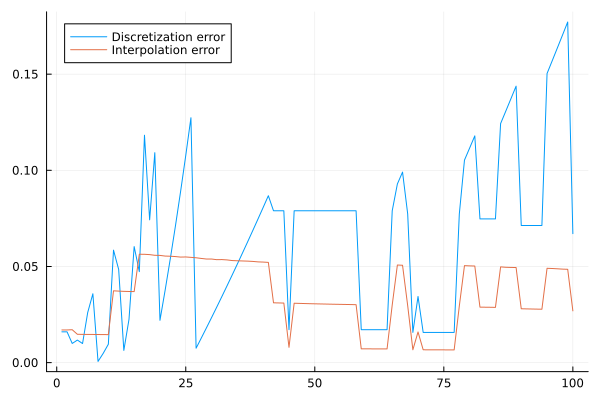

In [31]:
error_plot = plt.plot(errord, label="Discretization error")
error_plot = plt.plot!(errori, label="Interpolation error")

We see that the error in approximation is smaller using the linear interpolation method compared to the discretization method. (@ryan maybe add in exactly what the errors are here otherwise we can leave as is )

@ryan wrote some code here to do figures for the different values of gamma. feel free to edit as needed

In [ ]:
include("policy_interpolation.jl")

plot_main = plot(size=(800, 500))  # Adjust the size of the plot

# Define gamma values
gamma_values = [1, 2, 5]

# Loop over gamma values
for γ in gamma_values
    # Solve consumer problem for different values of γ
    cp = ConsumerProblem(γ=γ)
    a_path, c_path, y_path = compute_series(cp)

    # Calculate standard deviation of the consumption path
    std_dev = round(std(c_path), digits=3)
    
    # Concatenate gamma and standard deviation to label
    label = "γ = $γ, σ = $std_dev"

    # Plot consumption path
    if γ == gamma_values[1]
        plot!(plot_main, c_path, label = label)
    else
        plot!(c_path, label = label)
    end
end

# Add labels and legend
xlabel!(plot_main, "Time")
ylabel!(plot_main, "Consumption")
title!(plot_main, "Consumption Path for Different Values of γ")


**Problem 2C**

We see that the standard deviation of consumption is decreasing as the coefficient of relative risk aversion is increasing. This makes sense as we expect that the more risk averse the agent is, the more they would want to smooth consumption


@ryan wrote some code here to do figures for the different values of gamma. feel free to edit as needed

In [ ]:
# Initialize main plot
plot_main = plot(size=(800, 500))  # Adjust the size of the plot

# Define sigma values
innovation_variance = [0.01, 0.06, 0.12]

# Loop over sigma values
for variance in innovation_variance
    σ= sqrt(variance)
    state_values, transition_matrix= extract_rouwenhorst(ρ= 0.9, σ= σ, μ= 0)
    state_values= exp.(state_values)
    transition_matrix= transition_matrix 

    # Solve consumer problem for different values of γ
    cp = ConsumerProblem()
    a_path, c_path, y_path = compute_series(cp)

    # Calculate savings rate
    savings_path= 1 .- c_path./y_path
    
    # label string
    rounded_σ= round(σ, digits= 3)
    label_str = "\$\\sigma_{\\epsilon}^{2} = $variance\$"

    # Plot consumption path
    if σ == sigma_values[1]
        plot!(plot_main, savings_path, label = label_str)
    else
        plot!(savings_path, label = label_str)
    end
end

# Add labels and legend
xlabel!(plot_main, "Time")
ylabel!(plot_main, "Savings rate")
title!(plot_main, "Savings Path for Different Values of \$\\sigma_{\\epsilon}^{2}\$")

**Problem 2D**

We see that with larger innovations in the variance of income, the savings rate is larger. Again, this makes sense. If income is more uncertain, individuals would want to save more to insure against the income risk. The precautionary motive for savings is increasing the variance of income



**Problem 2E**

We see that by relaxing the "no-borrowing" constraint and using the natural debt limit instead increases the average consumption. This makes sense as households are now able to borrow to smooth consumption. We also see this in the plot of consumption as the consumption path is "smoother" with the natural debt limit and does not perfectly track income as in the previous case. 

**Problem 2F**

